We will create 3 different models:
- PD (Probability of Default) - showing a customer not repaying their debt in full or on time.
- LGD (Loss Given Default) - showing the proportion of an exposure a company loses when a customer defaults.
The proportion of the total exposure that cannot be recovered by the lender once a default has occured.
- EAD (Expoosure at Default) - showing the total loss in terms of amount of money the bank is exposed to if a customer defaults.

EL (expected loss) = PD * LGD * EAD

Estimating expected loss (expected credit loss)
Definition: The amount a lender might lose by lending to a borrower

Capital requirement -- Capital adequacy ratio (CAR):
Capital / Risk-weighted assets (Loans) >= 8%

Basel II Accord:
- Minimum Capital Requirement: How much capital banks need to have
    - Credit risk
    - Operational risk
    - Market risk
- Supervisory Review: How capital is defined
- Market Discipline: How capital is compared against risk-weighted assets

The greater the risk a bank is exposed to, the greater the amount of capital it needs to hold

Basel II Accord prescribes that regulators should allow banks to choose from 3 different approaches for calculating or modeling credit risk (calculating or modeling each of the 3 components of the expected loss):
- standardized approach (SA)
- internal ratings based (IRB) approaches
    - foundation internal ratings based (F-IRB) approach
    - advanced internal ratings based (A-IRB) approach

In this project, we are going to focus on the general case:
Enough data are available for implementing a traditional statistical methodology to build credit risk models.

Loan to value ratio (LTV) : The proportion of the property that is funded by the loan

Return on assets (ROA) = Net income / Total assets
Return on equity (ROE) = Net income / Shareholders' equity
Current ratio = Current assets / Current liabilities
Debt ratio = Total liabilities / Total assets

Application model : is used to estimate a firm's credit rating at the moment of application
The estimated credit ratings are the basis oon which banks decide whether to grant a loan or not, a bank may also use the estimated credit ratings to decide how to price the loan.

Behavioral model: is used to calculate probability of default and respectively expected loss after a loan is granted, banks may also use behavioral models to decide whether to grant an additional loan to an existing customer.


Our goal is to learn how to build statistical models for estimating EL.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
# Import Data
loan_data_backup = pd.read_csv('/Users/mang/Desktop/applied machine learning/individual assignment/Credit-Risk-Modeling-in-Python/loan_data_2007_2014.csv')
loan_data_backup.head()

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_6559/453420008.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('/Users/mang/Desktop/applied machine learning/individual assignment/Credit-Risk-Modeling-in-Python/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_data = loan_data_backup.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [7]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year', '')

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_6559/685063253.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [9]:
type(loan_data['emp_length_int'][0])

str

In [10]:
# transform to numeric
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [11]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [12]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [13]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [14]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [16]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
# check 'mths_since_earliest_cr_line' column vlaues which less than 0 (year should be 19xx not 206x)
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [18]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_6559/2332624952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [19]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [20]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
loan_data['term_int'] = loan_data['term'].str.replace('months', '')

In [22]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [23]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [24]:
loan_data['mths_since_issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [25]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-1') - loan_data['mths_since_issue_d']) / np.timedelta64(1, 'M')))

In [26]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [28]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [29]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [30]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [31]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [32]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [33]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [34]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [35]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [36]:
pd.options.display.max_rows = 100

In [37]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [38]:
loan_data['annual_inc'].fillna((loan_data['annual_inc']).mean(), inplace = True)

In [39]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

## PD model

### Data Preparation

##### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [40]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [41]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [42]:
# good 0, bad 1
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (16-30 days)']), 0, 1)

In [43]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

Fine-classing: turning continuous variables into categories, splitting a variable into roughly equal categories according to an internal criteria, such as the values of the variable or the number of cases in each category.

Weight of evidence: shows to what extent an independent variable would predict a dependent variable.

Coarse classing: the process of constructing new categories based on the initial ones, splitting a variable into categories according to an external criteria that show how much the categories explain another variable, such as weight of evidence.

Information value: how much information the original independent variable brings with respect to explaining the dependent variable brings with respect to explaining the dependent variable, is calculated from weight of evidence and the difference of the proportions of two outcomes accross all categories of an original independent variable.

Overfitting: Our statistical model has focused on a particular dataset so much that it has missed the point
Underfitting: The model fails to capture the underlying logic of the data

##### Splitting Data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 278371      278371  31397190   33970418      18825        18825   
 19424        19424    675170     862894       6625         6625   
 435710      435710  12535242   14547393       4800         4800   
 334951      334951  22234803   24557306      11500        11500   
 305711      305711  27541081   30044174      16400        16400   
 ...            ...       ...        ...        ...          ...   
 74173        74173   8117963    9859934      26400        26400   
 452615      452615  11154640   13066791      15000        15000   
 75414        75414   8145037    9887154      11500        11500   
 147137      147137   4309991    5492607      33500        33500   
 1989          1989   1042405    1272482       5000         5000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 278371          18825.0   36 months     14.49       647.89     C        C4   
 19424            6575.0

In [46]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

##### Data Preparation

In [47]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [48]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [49]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,1
36159,C,0


In [50]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [51]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.964775
1,B,0.929199
2,C,0.899426
3,D,0.864272
4,E,0.826821
5,F,0.776923
6,G,0.754333


In [52]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()],
                axis=1)
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.964775
1,B,109730,B,0.929199
2,C,100245,C,0.899426
3,D,61498,D,0.864272
4,E,28612,E,0.826821
5,F,10530,F,0.776923
6,G,2654,G,0.754333


In [53]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.964775
1,B,109730,0.929199
2,C,100245,0.899426
3,D,61498,0.864272
4,E,28612,0.826821
5,F,10530,0.776923
6,G,2654,0.754333


In [54]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.964775
1,B,109730,0.929199
2,C,100245,0.899426
3,D,61498,0.864272
4,E,28612,0.826821
5,F,10530,0.776923
6,G,2654,0.754333


In [55]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.964775,0.160200
1,B,109730,0.929199,0.294160
2,C,100245,0.899426,0.268733
3,D,61498,0.864272,0.164862
4,E,28612,0.826821,0.076702
5,F,10530,0.776923,0.028228
6,G,2654,0.754333,0.007115


In [56]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.964775,0.160200,57654.0,2105.0
1,B,109730,0.929199,0.294160,101961.0,7769.0
2,C,100245,0.899426,0.268733,90163.0,10082.0
3,D,61498,0.864272,0.164862,53151.0,8347.0
4,E,28612,0.826821,0.076702,23657.0,4955.0
5,F,10530,0.776923,0.028228,8181.0,2349.0
6,G,2654,0.754333,0.007115,2002.0,652.0


In [57]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055
1,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264
2,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205
4,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656
5,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982


In [58]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,1.081435
1,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,0.345739
2,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,-0.037842
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,-0.377475
4,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,-0.665448
5,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,-0.980885
6,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,-1.106852


In [59]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,-1.106852
1,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,-0.980885
2,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,-0.665448
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,-0.377475
4,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,-0.037842
5,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,0.345739
6,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,1.081435


In [60]:
# calculate the differences in the proportion of good loans between two subsequent categories and the difference of weight of evidence between two subsequent categories.
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,-1.106852,NaN,NaN
1,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,-0.980885,0.022590,0.125967
2,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,-0.665448,0.049898,0.315437
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,-0.377475,0.037451,0.287973
4,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,-0.037842,0.035154,0.339633
5,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,0.345739,0.029773,0.383581
6,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,1.081435,0.035576,0.735695


In [61]:
# information value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,-1.106852,NaN,NaN,0.277898
1,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,-0.980885,0.022590,0.125967,0.277898
2,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,-0.665448,0.049898,0.315437,0.277898
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,-0.377475,0.037451,0.287973,0.277898
4,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,-0.037842,0.035154,0.339633,0.277898
5,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,0.345739,0.029773,0.383581,0.277898
6,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,1.081435,0.035576,0.735695,0.277898


##### Preprocessing discrete variables: automating calculations

In [62]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    

In [63]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,-1.106852,NaN,NaN,0.277898
1,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,-0.980885,0.022590,0.125967,0.277898
2,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,-0.665448,0.049898,0.315437,0.277898
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,-0.377475,0.037451,0.287973,0.277898
4,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,-0.037842,0.035154,0.339633,0.277898
5,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,0.345739,0.029773,0.383581,0.277898
6,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,1.081435,0.035576,0.735695,0.277898


##### Preprocessing Discrete Variables: Visualizing Results

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):  # set default value 0, by default, the label should be displayed horizontally
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ') + df_WoE.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

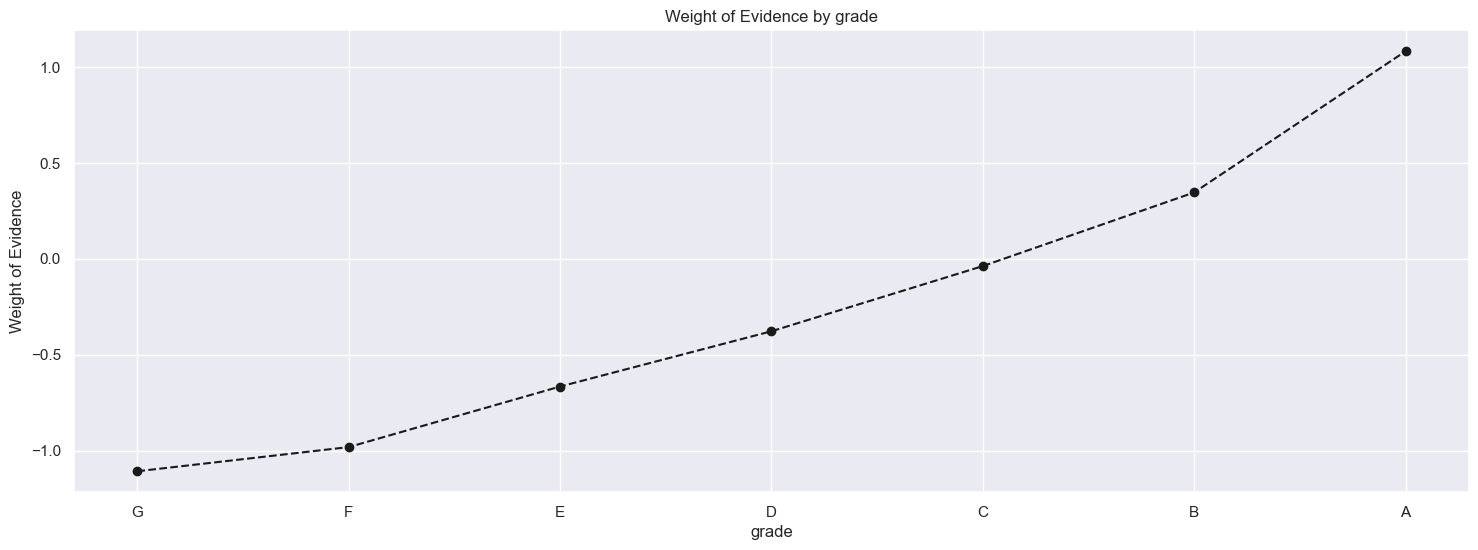

In [66]:
plot_by_woe(df_temp)

##### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [67]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000324,0.000772,-0.869566,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000101,0.000165,-0.494109,0.054380,0.375458,inf
2,RENT,150599,0.887722,0.403720,133690.0,16909.0,0.396978,0.466339,-0.161032,0.037722,0.333077,inf
3,OWN,33295,0.905181,0.089256,30138.0,3157.0,0.089492,0.087068,0.027455,0.017459,0.188487,inf
4,MORTGAGE,188956,0.914483,0.506546,172797.0,16159.0,0.513102,0.445655,0.140931,0.009302,0.113476,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.085517,inf,inf


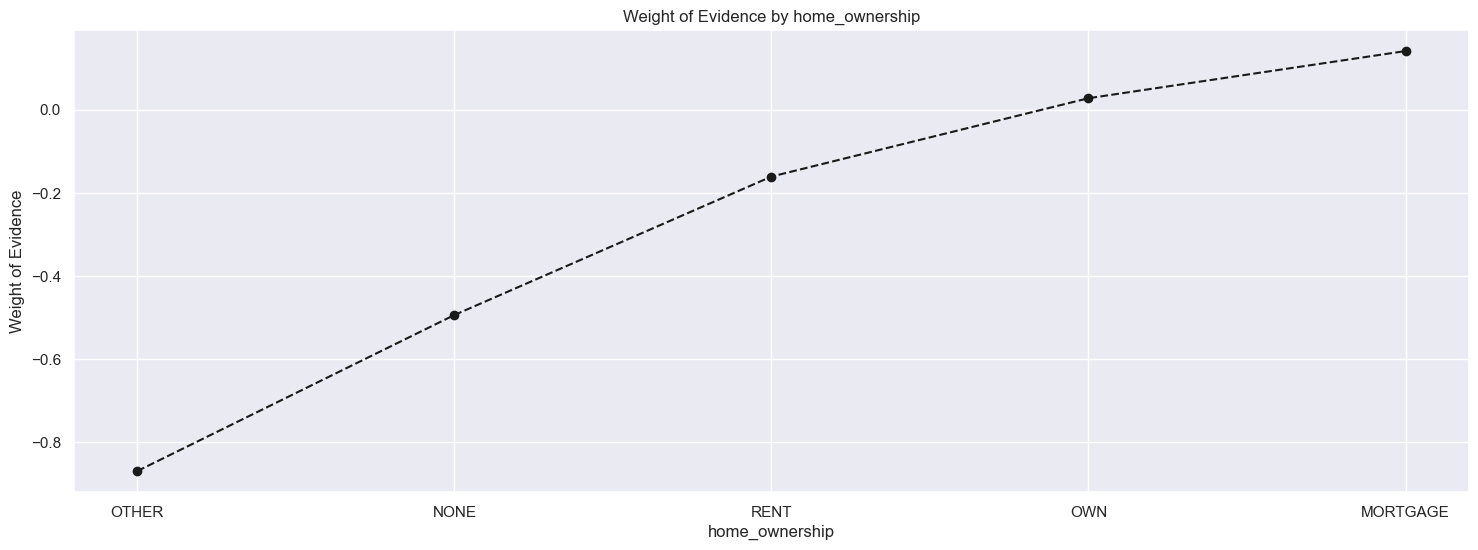

In [68]:
plot_by_woe(df_temp)

The categories 'OTHER' and 'NONE' are associated with the highest probability of default (There are very few loans associated with these categories, less than 0.1% each, check 'prop_n_obs' column in df_temp). 'ANY' has only one observation.

In these cases, we combine such underrepresented categories that are similar to them.

Let's combine 'OTHER', 'NONE' and 'ANY' with the riskiest category with enough number of observations - 'RENT'.

Borrowers with category 'OWN' have a considerably higher weight of evidence than the ones with category 'RENT', so these two categories will be in two different dummy variables.

The 'MORTGAGE' category encompasses about half of all borrowers. Hence, it will be in a separate dummy variable.

In sum, 3 categories: ('OTHER', 'NONE', 'ANY' and 'RENT), 'OWN', 'MORTGAGE'.

In [71]:
df_inputs_prepr['home_ownership:RENT_OOTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:ANY'], df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:OTHER']])

##### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2